In [1]:
import cv2
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib
import statistics as stat
import tifffile as tif

# Background Estimation

In [2]:
filename = "video1.avi"
location = "D:/Harshavardan/classical-conditioning/analysis/F3/"
length = 10000

count = 0
random = np.random.randint(0, length, 25)

bg_frames = [] #stores frames to used for bg calculation

cap = cv2.VideoCapture(location + filename)

while cap.isOpened:
    
    ret,frame = cap.read()
    
    if ret == 0:
        break
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if count == length:
        break
        
    if count in random:
        copy = frame.copy()
        bg_frames.append(copy)
    
    cv2.imshow("frame", frame)  
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    count += 1
    
cap.release()
cv2.destroyAllWindows()

bg_frames = np.array(bg_frames)
bg = np.median(bg_frames, axis = 0)
bg = cv2.convertScaleAbs(bg)
cv2.imshow('Background', bg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
tif.imsave(location+filename.split('.avi')[0]+'.tif',bg)

In [4]:
#matplotlib.image.imsave(location + filename[:-4] + '.tif', bg)

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = bg_frames[0]
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


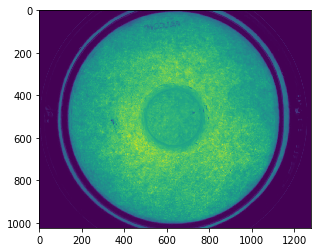

In [6]:
plt.imshow(img)

In [7]:
img[0, 0]

0